# Problem Description

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

In [713]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')


In [667]:
df=pd.read_csv("Automobile_insurance_fraud.csv")
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


We have 1000 rows and 40 columns

In [668]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

'_c39' only this column have complete nan value. so lets drop it

In [669]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [670]:
pd.set_option('display.max_rows',None)
for col in df.columns:
    if df[col].dtype=="object":
        print(df[col].value_counts())
        print()

28-04-1992    3
05-08-1992    3
01-01-2006    3
25-09-2001    2
06-05-2007    2
09-08-2004    2
16-05-2008    2
28-12-2002    2
14-12-1991    2
08-11-2009    2
21-12-2002    2
07-07-1996    2
25-05-1990    2
22-08-1991    2
14-04-1992    2
07-11-1997    2
07-12-1995    2
07-12-1999    2
11-11-1998    2
15-05-1997    2
04-06-2000    2
29-09-1999    2
09-07-2002    2
21-09-1996    2
15-11-1997    2
20-09-1990    2
09-03-2003    2
07-04-1999    2
03-01-2004    2
05-07-2014    2
04-05-2000    2
11-03-2010    2
24-06-1990    2
28-01-2010    2
20-07-1991    2
21-09-2005    2
16-07-2002    2
14-07-1997    2
19-09-1995    2
25-12-2013    2
29-01-1998    2
03-02-1997    2
27-07-2014    2
05-01-1992    2
30-08-1993    2
28-12-1991    2
25-04-2014    1
21-04-2014    1
03-06-1991    1
17-05-1994    1
01-12-2008    1
02-10-2003    1
07-11-2012    1
19-09-2012    1
08-04-2003    1
24-12-2012    1
04-08-1997    1
10-12-1993    1
27-12-2000    1
11-05-2010    1
04-12-2007    1
04-12-1995    1
09-05-20

Here we can see that some columns have '?' instead os nan so leta replace it as nan

In [671]:
df=df.replace('?',np.NaN)

Now its replace with nan. lets check tha nan value

In [672]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

so we can see that four column have missing data.drop _c39 columns as above mensioned

# Handlimg NaN value 

In [673]:
df.drop("_c39",inplace=True,axis=1)

In [674]:
def imput_nan_category(DataFrame,ColName):
    most_frequent_category=DataFrame[ColName].mode()[0]  # .mode()[0]--->first category name
    DataFrame[ColName + "_Imputed"] = DataFrame[ColName] # replace nan values with most occured category
    DataFrame[ColName + "_Imputed"].fillna(most_frequent_category,inplace=True)

In [675]:
for columns in ['collision_type','property_damage','police_report_available']:
    imput_nan_category(df,columns)
    

call function to impute most occured category

In [676]:
# Display imputed result

df[['collision_type','collision_type_Imputed','property_damage','property_damage_Imputed',
    'police_report_available','police_report_available_Imputed']].head(10)

,collision_type,collision_type_Imputed,property_damage,property_damage_Imputed,police_report_available,police_report_available_Imputed
0,Side Collision,Side Collision,YES,YES,YES,YES
1,NaN,Rear Collision,NaN,NO,NaN,NO
2,Rear Collision,Rear Collision,NO,NO,NO,NO
3,Front Collision,Front Collision,NaN,NO,NO,NO
4,NaN,Rear Collision,NO,NO,NO,NO
5,Rear Collision,Rear Collision,NO,NO,NO,NO
6,Front Collision,Front Collision,NaN,NO,NaN,NO
7,Front Collision,Front Collision,NaN,NO,YES,YES
8,Front Collision,Front Collision,NO,NO,YES,YES
9,Rear Collision,Rear Collision,NO,NO,NaN,NO


Here we can see that three more columns which imputed nan value.Lets drop original columns

In [677]:
df=df.drop(['collision_type','property_damage','police_report_available'],axis=1)

In [678]:
df.isnull().sum()

months_as_customer                 0
age                                0
policy_number                      0
policy_bind_date                   0
policy_state                       0
policy_csl                         0
policy_deductable                  0
policy_annual_premium              0
umbrella_limit                     0
insured_zip                        0
insured_sex                        0
insured_education_level            0
insured_occupation                 0
insured_hobbies                    0
insured_relationship               0
capital-gains                      0
capital-loss                       0
incident_date                      0
incident_type                      0
incident_severity                  0
authorities_contacted              0
incident_state                     0
incident_city                      0
incident_location                  0
incident_hour_of_the_day           0
number_of_vehicles_involved        0
bodily_injuries                    0
w

now solved nan value issue

In [679]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_make', 'auto_model', 'auto_year', 'fraud_reported',
       'collision_type_Imputed', 'property_damage_Imputed',
       'police_report_available_Imputed'],
      dtype='object')

In [680]:
df=df.drop(["months_as_customer","incident_location","incident_city"],axis=1)

In [681]:
df.shape

(1000, 36)

now we have 1000 rows and 36 columns

# Graphical representation of imbalance target 

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

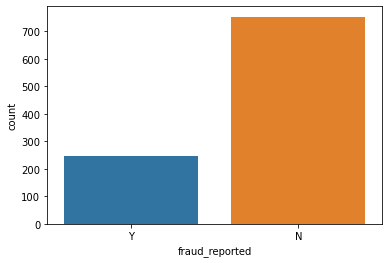

In [682]:
sns.countplot(df["fraud_reported"])

This is our target column so here we can see that in that datas are  imbalance . Large classification error over the fraud_report

In [683]:
df["fraud_reported"].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [684]:
df=df.drop(["policy_bind_date","incident_date","policy_csl"],axis=1)

In [685]:
df.describe()

,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


 1 standard deviation is lesser than the mean in almost column so datas are spreaded in limit
    
 2 can see the differents in mean and median

 3  maximum and 75% also can see differents
    
 4  here we can conclude that capital gain column can see more differents.   

In [686]:
df.skew()

age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
dtype: float64

skewed columns: umbrella_limit,insured_zip,vehicle_claim

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='umbrella_limit', ylabel='Density'>

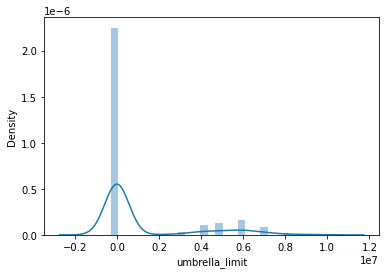

In [687]:
sns.distplot(df["umbrella_limit"])

it is right skew 

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='insured_zip', ylabel='Density'>

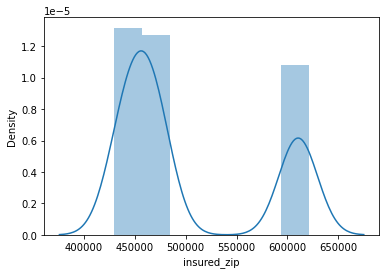

In [688]:
sns.distplot(df["insured_zip"])

it is similer to norml curve

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='vehicle_claim', ylabel='Density'>

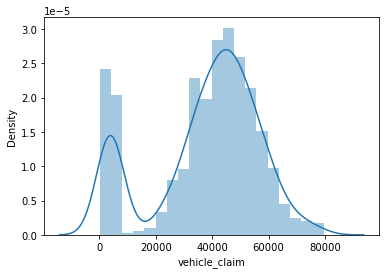

In [689]:
sns.distplot(df["vehicle_claim"])

it is also similer to normal

In [690]:
skew =('umbrella_limit','insured_zip','vehicle_claim')
for i in skew:
    if df.skew().loc[i]>0.55:
        df[i] = np.log1p(df[i])

C:\Users\USER\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [691]:
df.skew()

age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.494499
insured_zip                    0.782405
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
dtype: float64

Remove the skewness

In [692]:

for col in df.columns:
    if df[col].dtype=="object":
        print(df[col].value_counts())

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64
reading           64
paintball         57
exercise          57
bungie-jumping    56
camping           55
golf              55
movies            55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess     

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

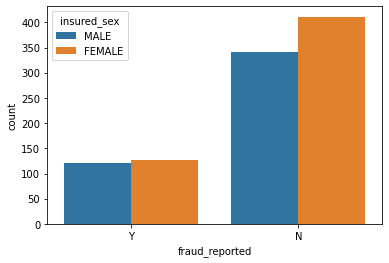

In [693]:
sns.countplot(x="fraud_reported",hue="insured_sex",data=df)

when we check the fraud_reported we can see that high number of female are not in the categery of fraud.

<AxesSubplot:xlabel='number_of_vehicles_involved', ylabel='count'>

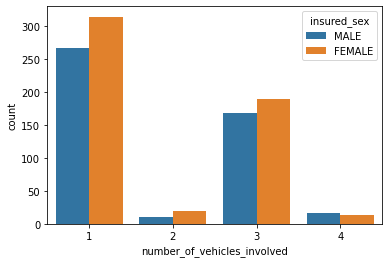

In [694]:
sns.countplot(x="number_of_vehicles_involved",hue="insured_sex",data=df)

<AxesSubplot:xlabel='insured_relationship', ylabel='count'>

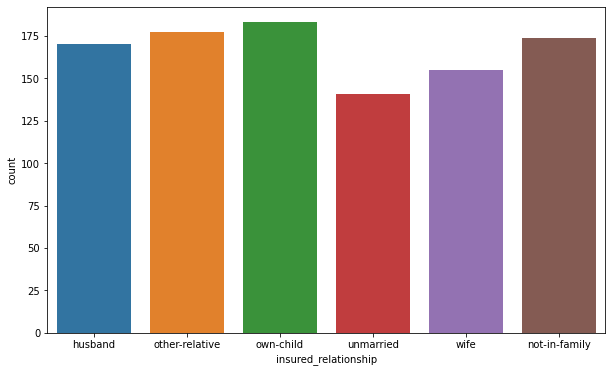

In [695]:
plt.figure(figsize=(10,6))
sns.countplot(x="insured_relationship",data=df)

# LabelEncoder

In [696]:
label=LabelEncoder()
df["fraud_reported"]=label.fit_transform(df["fraud_reported"])


In [697]:
col =["policy_state","insured_sex","insured_education_level","insured_occupation","insured_hobbies","insured_relationship","incident_type",
         "incident_severity","authorities_contacted","incident_state","auto_make","auto_model","collision_type_Imputed","property_damage_Imputed","police_report_available_Imputed"]
for i in col:
    df[i]=label.fit_transform(df[i])

In [698]:
df

,age,policy_number,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,collision_type_Imputed,property_damage_Imputed,police_report_available_Imputed
0,48,521585,2,1000,1406.91,0.000000,13.052226,1,4,2,...,6510,13020,52080,10,1,2004,1,2,1,1
1,42,342868,1,2000,1197.22,15.424949,13.056602,1,4,6,...,780,780,3510,8,12,2007,1,1,0,0
2,29,687698,2,2000,1413.14,15.424949,12.973011,0,6,11,...,7700,3850,23100,4,30,2007,0,1,0,0
3,41,227811,0,2000,1415.74,15.607270,13.318124,0,6,1,...,6340,6340,50720,3,34,2014,1,0,0,0
4,44,367455,0,1000,1583.91,15.607270,13.322373,1,0,11,...,1300,650,4550,0,31,2009,0,1,0,0
5,39,104594,2,1000,1351.10,0.000000,13.078322,0,6,12,...,6410,6410,51280,10,3,2003,1,1,0,0
6,34,413978,1,1000,1333.35,0.000000,12.998425,1,6,9,...,21450,7150,50050,9,29,2012,0,0,0,0
7,37,429027,0,1000,1137.03,0.000000,13.309997,1,0,12,...,9380,9380,32830,1,5,2015,0,0,0,1
8,33,485665,0,500,1442.99,0.000000,13.307572,0,6,7,...,2770,2770,22160,12,9,2012,0,0,0,1
9,42,636550,0,500,1315.68,0.000000,13.306324,1,6,8,...,4700,4700,32900,10,1,1996,0,1,0,0


In [703]:
df["umbrella_limit"]=df["umbrella_limit"].fillna(0)

In [709]:
df["policy_annual_premium"]=df["policy_annual_premium"].astype(int)

# Split

In [710]:
x=df.drop(columns=["fraud_reported"])
y=df[["fraud_reported"]]

In [711]:
scale=StandardScaler()
x=scale.fit_transform(x)

In [722]:

maxAccu=0
maxRs=0
for i in range(100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
    lr =LogisticRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i

print("best accuracy is",maxAccu,"on random_state",maxRs)        

best accuracy is 0.8242424242424242 on random_state 20


In [723]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=20)

In [725]:
lr=LogisticRegression()
parameter={'C':10.0 **np.arange(-2,3),
     'penalty':["l1","l2","elasticnet","none"]}
cv=KFold(n_splits=5,random_state=None,shuffle=False)
gcv=GridSearchCV(lr,parameter,cv=cv)


In [727]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']})

In [728]:
gcv.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [729]:
y_pred=gcv.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[240  13]
 [ 53  24]]
0.8
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       253
           1       0.65      0.31      0.42        77

    accuracy                           0.80       330
   macro avg       0.73      0.63      0.65       330
weighted avg       0.78      0.80      0.77       330



In [730]:
class_weight=dict({0:1,1:100})
classifier=RandomForestClassifier(class_weight=class_weight)
classifier.fit(x_train,y_train)

RandomForestClassifier(class_weight={0: 1, 1: 100})

In [731]:
y_pred=classifier.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[241  12]
 [ 57  20]]
0.7909090909090909
              precision    recall  f1-score   support

           0       0.81      0.95      0.87       253
           1       0.62      0.26      0.37        77

    accuracy                           0.79       330
   macro avg       0.72      0.61      0.62       330
weighted avg       0.77      0.79      0.76       330



conclusion:

LogisticRegression is the best model

In [747]:
import joblib
joblib.dump(lr,"lr_model.pkl")

['lr_model.pkl']